 ### Import necessary packages

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Read in csv files

In [10]:

df1 = pd.read_csv("/Users/seantan88/Documents/GitHub/ElectricityCluster/daily_merit_MW_first6mos.csv")


### Run elbow method to determine optimal number of clusters

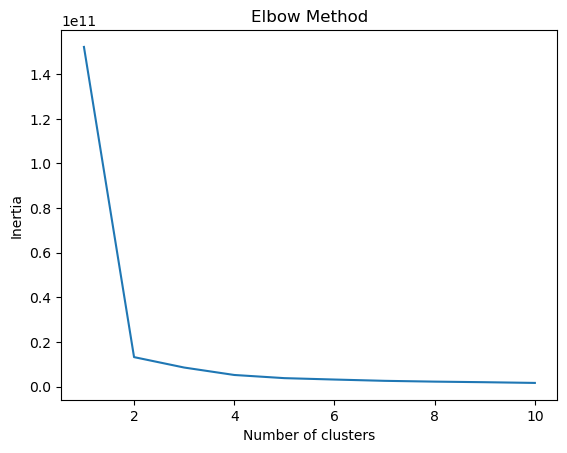

In [12]:

def elbow_method(df, features):
    # perform the elbow method to determine the optimal number of clusters
    # create a list of inertia values for each number of clusters
    inertia = []
    # loop through the number of clusters from 1 to 10
    for i in range(1, 11):
        # create a kmeans model
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        # fit the model to the features
        kmeans.fit(df[[str(features[0]), str(features[1])]])
        # append the inertia value to the list
        inertia.append(kmeans.inertia_)


    # plot the inertia values
    plt.plot(range(1, 11), inertia)
    # add labels
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    # show the plot
    plt.show()

elbow_method(df1, ['block_price', 'block_size'])


### Run a K-Means clustering algorithm

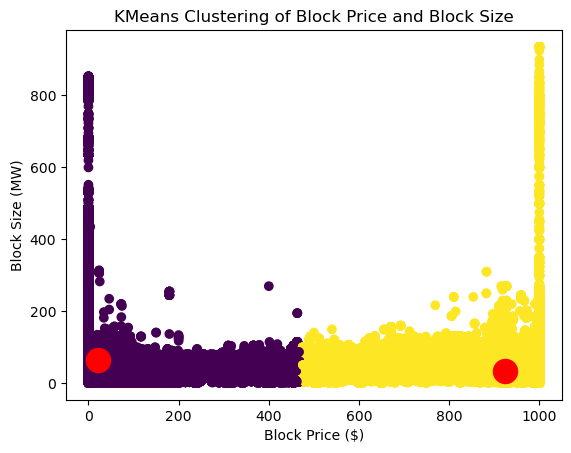

   cluster  block_price_mean  block_size_mean
0        0         20.499060        63.620782
0        1        924.609433        33.496608
   cluster    size
0        0  867255
0        1  211362


In [18]:
def kmeans_cluster(df, feature1, feature2, nclusters, labelx, labely, title):
    # fit the kmeans model to the features, using 3 clusters
    kmeans = KMeans(n_clusters = nclusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    # fit the model to the features
    kmeans.fit(df[[feature1, feature2]])
    # add a new column to df3 that contains the cluster labels
    df['cluster'] = kmeans.labels_
    # create new figure
    plt.figure()

    # plot the clusters
    plt.scatter(df[feature1], df[feature2], c = kmeans.labels_, cmap = 'viridis')
    # plot the centroids
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red')
    # add the generator ids to the plot so we can see which generators are in each cluster
    #for i in range(len(df3['asset_ID'])):
        #plt.text(df3['block_price'][i], df3['System Capability'][i], df3['asset_ID'][i])
    # add labels
    plt.title(title)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    # show the plot
    plt.show()

kmeans_cluster(df1, 'block_price', 'block_size', 2, 'Block Price ($)', 'Block Size (MW)', 'KMeans Clustering of Block Price and Block Size')

#function to generate a table of the cluster means, and average block price and block size for each cluster
def cluster_means(df, feature1, feature2):
    # create a new dataframe to store the cluster means
    cluster_means = pd.DataFrame()
    # loop through the clusters
    for i in range(df['cluster'].nunique()):
        # calculate the mean of the block price for the cluster
        block_price_mean = df[df['cluster'] == i][feature1].mean()
        # calculate the mean of the block size for the cluster
        block_size_mean = df[df['cluster'] == i][feature2].mean()
        # add the cluster means to the dataframe
        cluster_means = cluster_means._append(pd.DataFrame({'cluster': [i], 'block_price_mean': [block_price_mean], 'block_size_mean': [block_size_mean]}))
    # return the dataframe
    return cluster_means

print(cluster_means(df1, 'block_price', 'block_size'))

#function to generate a table of the cluster sizes
def cluster_sizes(df):
    # create a new dataframe to store the cluster sizes
    cluster_sizes = pd.DataFrame()
    # loop through the clusters
    for i in range(df['cluster'].nunique()):
        # calculate the size of the cluster
        cluster_size = df[df['cluster'] == i].shape[0]
        # add the cluster size to the dataframe
        cluster_sizes = cluster_sizes._append(pd.DataFrame({'cluster': [i], 'size': [cluster_size]}))
    # return the dataframe
    return cluster_sizes

print(cluster_sizes(df1))





### Overview of monthly block price average for combined-cycle generators

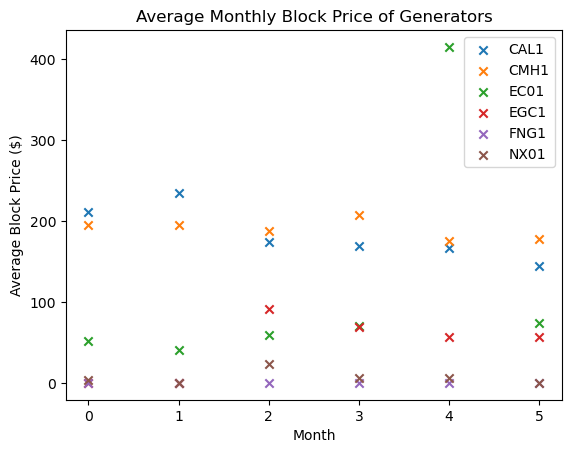

In [6]:
# load the data in
df2 = pd.read_csv('asset_monthly_average.csv')
# create a scatterplot of the average monthly block price of each generator

# drop the first column of df2, which contains the months
df2 = df2.drop(columns = 'begin_dateTime_mpt')

# create new figure
plt.figure()
# plot the average monthly block price of each generator
for column in df2.columns:
    plt.scatter(df2.index, df2[column], label = column, marker = 'x')
# add labels
plt.title('Average Monthly Block Price of Generators')
plt.xlabel('Month')
plt.ylabel('Average Block Price ($)')
# show the legend
plt.legend()
# show the plot
plt.show()







 ### ADD DESCRIPTION AND EXPLANATION ** ASK GILBERT ** 

### Plot average block price and standard deviation of block price at 7am (beginning of peak hours)

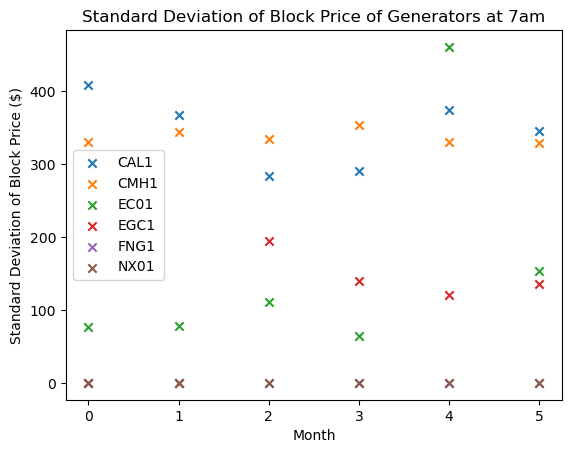

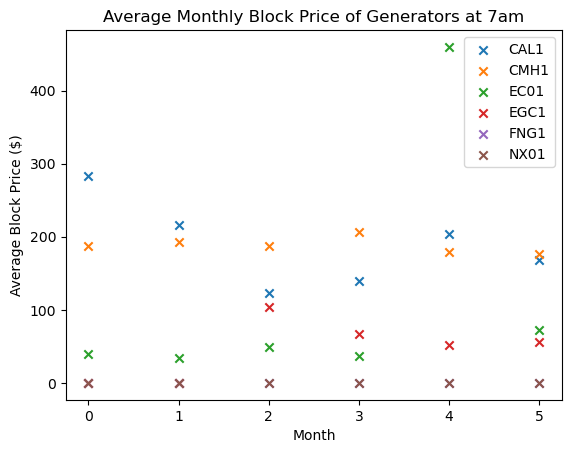

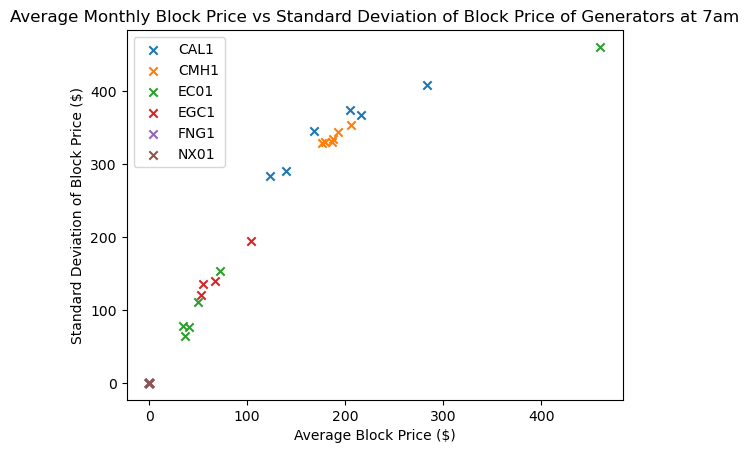

In [7]:
std_dev_df = pd.read_csv("asset_monthly_std_dev_7am.csv")
average_df = pd.read_csv("asset_monthly_average_7am.csv")

# drop the first column of each df, which contains the months
std_dev_df = std_dev_df.drop(columns = 'Unnamed: 0')
average_df = average_df.drop(columns = 'Unnamed: 0')
# scatterplot the standard deviation of the block price of each generator each month and the average monthly block price each month
# create new figure
plt.figure()
# plot the standard deviation of the block price of each generator each month
for column in std_dev_df.columns:
    plt.scatter(std_dev_df.index, std_dev_df[column], label = column, marker = 'x')
# add labels
plt.title('Standard Deviation of Block Price of Generators at 7am')
plt.xlabel('Month')
plt.ylabel('Standard Deviation of Block Price ($)')
# show the legend
plt.legend()
# show the plot
plt.show()

# create new figure
plt.figure()
# plot the average monthly block price of each generator
for column in average_df.columns:
    plt.scatter(average_df.index, average_df[column], label = column, marker = 'x')
# add labels, make the months on the x axis begin at 1
plt.title('Average Monthly Block Price of Generators at 7am')
plt.xlabel('Month')
plt.ylabel('Average Block Price ($)')
# show the legend
plt.legend()
# show the plot
plt.show()


# plot them against each other
plt.figure()
for column in average_df.columns:
    plt.scatter(average_df[column], std_dev_df[column], label = column, marker = 'x')
plt.title('Average Monthly Block Price vs Standard Deviation of Block Price of Generators at 7am')
plt.xlabel('Average Block Price ($)')
plt.ylabel('Standard Deviation of Block Price ($)')
plt.legend()
plt.show()

## Time Clustering

/var/folders/ds/43pqbgvs1pbg0dqkztr4zmv40000gn/T/ipykernel_12346/316317775.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour'] = data['begin_dateTime_mpt'].dt.hour
/Users/seantan88/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/ds/43pqbgvs1pbg0dqkztr4zmv40000gn/T/ipykernel_12346/316317775.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

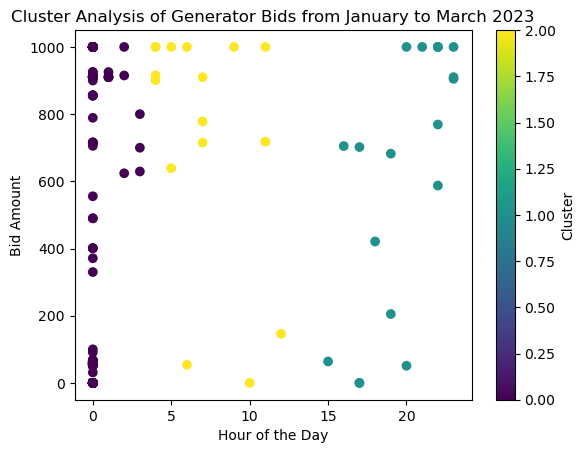

/var/folders/ds/43pqbgvs1pbg0dqkztr4zmv40000gn/T/ipykernel_12346/316317775.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour'] = data['begin_dateTime_mpt'].dt.hour
/Users/seantan88/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/ds/43pqbgvs1pbg0dqkztr4zmv40000gn/T/ipykernel_12346/316317775.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

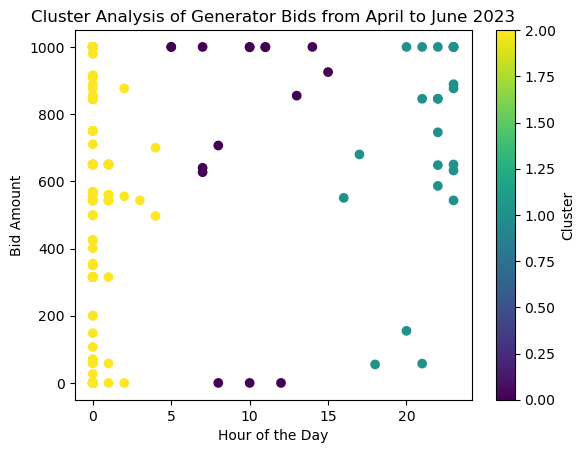

/var/folders/ds/43pqbgvs1pbg0dqkztr4zmv40000gn/T/ipykernel_12346/316317775.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour'] = data['begin_dateTime_mpt'].dt.hour
/Users/seantan88/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/ds/43pqbgvs1pbg0dqkztr4zmv40000gn/T/ipykernel_12346/316317775.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

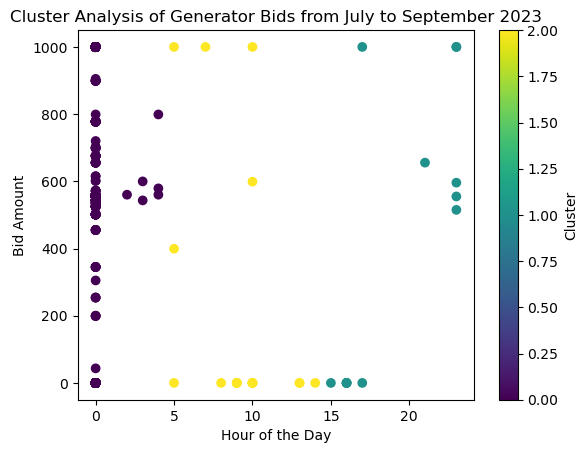

/var/folders/ds/43pqbgvs1pbg0dqkztr4zmv40000gn/T/ipykernel_12346/316317775.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour'] = data['begin_dateTime_mpt'].dt.hour
/Users/seantan88/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/ds/43pqbgvs1pbg0dqkztr4zmv40000gn/T/ipykernel_12346/316317775.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

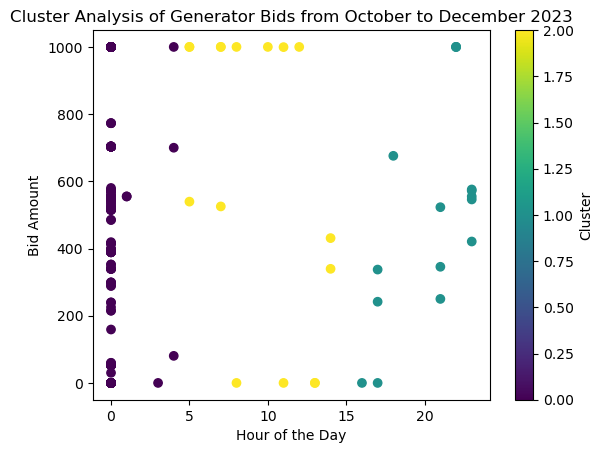

In [8]:
# Define a function to perform cluster analysis on bid times
def time_cluster_analysis(start_year, start_month, end_month, title, n_clusters):
    # Read the CSV file for generator bids into a DataFrame
    highest_block_prices_df = pd.read_csv('highest_block_prices_per_day.csv')

    # Convert the date column to a datetime object
    highest_block_prices_df['begin_dateTime_mpt'] = pd.to_datetime(highest_block_prices_df['begin_dateTime_mpt'])

    # Filter data for the specified date range
    data = highest_block_prices_df[
        (highest_block_prices_df['begin_dateTime_mpt'].dt.year == start_year) &
        (highest_block_prices_df['begin_dateTime_mpt'].dt.month >= start_month) &
        (highest_block_prices_df['begin_dateTime_mpt'].dt.month <= end_month)
    ]

    # Extract hour of the day
    data['Hour'] = data['begin_dateTime_mpt'].dt.hour

    # Perform cluster analysis
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data[['Hour']])
    data['Cluster'] = kmeans.predict(data[['Hour']])

    # Plot cluster analysis
    plt.scatter(data['Hour'], data['block_price'], c=data['Cluster'], cmap='viridis')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bid Amount')
    plt.title(title)
    plt.colorbar(label='Cluster')
    plt.show()

# Perform cluster analysis for each quarter of the year 2023
time_cluster_analysis(2023, 1, 3, 'Cluster Analysis of Generator Bids from January to March 2023', 3)
time_cluster_analysis(2023, 4, 6, 'Cluster Analysis of Generator Bids from April to June 2023', 3)
time_cluster_analysis(2023, 7, 9, 'Cluster Analysis of Generator Bids from July to September 2023', 3)
time_cluster_analysis(2023, 10, 12, 'Cluster Analysis of Generator Bids from October to December 2023', 3)

KeyError: "['System Capability'] not in index"